# **Servo Prediction using Linear Regression**

-------------

## **Objective**

Data Preparation:

Gather and preprocess your dataset. Ensure that you have a dataset with features (independent variables) and a target variable (the variable you want to predict). In this case, it's essential to have a dataset with servo motor-related features and a target variable related to servo motor behavior or performance.

Import Libraries:


Import the necessary libraries for data manipulation, linear regression, and evaluation metrics. For linear regression, you can use scikit-learn (a popular Python library for machine learning).

*python
Copy code*

import numpy as np


import pandas as pd


from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score


**Load and Split the Data:**
Load your dataset and split it into training and testing sets. Typically, you use the training set to train the model and the testing set to evaluate its performance.

python
Copy code
# Load your dataset
data = pd.read_csv("servo_data.csv")  # Replace with your data file or source

# Split the data into features (X) and target variable (y)
X = data.drop("target_column_name", axis=1)  # Replace 'target_column_name' with your target variable
y = data["target_column_name"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Create and Train the Linear Regression Model:
Create an instance of the LinearRegression class and fit it to your training data.

python
Copy code
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
Make Predictions:
Use the trained model to make predictions on the test data.

*python
Copy code*

y_pred = model.predict(X_test)

**Evaluate the Model:**
Assess the performance of the linear regression model using appropriate evaluation metrics. Common metrics include mean squared error (MSE) and R-squared (R2).

*python
Copy code*

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


These metrics will give you an idea of how well your linear regression model is performing in predicting servo behavior.

**Visualization (Optional):**
You can visualize the predictions and actual values to get a better understanding of the model's performance.

## **Data Source**

## **Import Library**

In [45]:
import numpy as np
import pandas as pd

## **Import Data**

In [46]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

## **Describe Data**

In [47]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [48]:
df.describe

<bound method NDFrame.describe of     Motor Screw  Pgain  Vgain  Class
0       E     E      5      4      4
1       B     D      6      5     11
2       D     D      4      3      6
3       B     A      3      2     48
4       D     B      6      5      6
..    ...   ...    ...    ...    ...
162     B     C      3      2     44
163     B     E      3      1     40
164     C     D      4      3     25
165     A     B      3      2     44
166     A     A      6      5     20

[167 rows x 5 columns]>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


## **Data Preprocessing**

In [50]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [51]:
df.shape

(167, 5)

In [52]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [53]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

*Encoding of categorical value*

In [54]:
df.replace({'Motor':{'A': 0,'B': 1,'C': 3,'D':4,'E':5}},inplace=True)

In [55]:
df.replace({'Screw':{'A': 0,'B': 1,'C': 3,'D':4,'E':5}},inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [56]:
y = df['Class']

In [58]:
y.shape

(167,)

In [59]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [60]:
X = df[['Motor','Screw', 'Pgain','Vgain']]

In [61]:
X = df.drop('Class',axis=1)

In [62]:
X.shape

(167, 4)

In [63]:
X

,Motor,Screw,Pgain,Vgain
0,5,5,5,4
1,1,4,6,5
2,4,4,4,3
3,1,0,3,2
4,4,1,6,5
...,...,...,...,...
162,1,3,3,2
163,1,5,3,1
164,3,4,4,3
165,0,1,3,2


## **Train Test Split**

In [64]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2529)

In [81]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [82]:
X_train

,Motor,Screw,Pgain,Vgain
76,5,3,4,1
159,0,0,5,4
157,0,1,3,1
120,1,1,4,1
10,1,5,6,5
...,...,...,...,...
72,3,1,5,4
143,0,1,4,2
60,5,1,4,2
50,4,0,6,5


In [83]:
y_train

76      4
159    20
157    45
120    13
10      9
       ..
72     12
143    20
60     13
50      8
96     23
Name: Class, Length: 116, dtype: int64

In [84]:
y_test

35     29
107    34
127     8
115    21
160    39
156    26
53     11
89      6
6      46
165    44
88     11
121    19
61     13
154     3
118    26
136    14
132     4
52     45
101    44
93     12
109    38
28     37
15     37
126    37
9      27
84     13
64     18
105     3
54     18
108     8
125    27
57     27
78     45
31     41
39      2
1      11
46     20
139    41
12      4
51     44
79     34
100    11
138     2
32     12
145    35
48     42
98     42
34     11
23     13
134     9
21     30
Name: Class, dtype: int64

## **Modeling**

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train, y_train)

LinearRegression()

## **Prediction**

In [88]:
y_pred = lr.predict(X_train)

In [89]:
y_pred.shape

(116,)

In [90]:
y_pred

array([ 1.08931428e+01,  2.44939904e+01,  3.76426691e+01,  2.15985142e+01,
        1.61477651e+00,  3.76260346e+01,  6.37659630e-04,  2.07914448e+01,
       -2.27217049e+00,  2.14910451e+01,  3.30970528e+01,  2.70114977e+01,
        2.62044283e+01,  2.53973589e+01,  1.08765082e+01,  1.84250698e+01,
        1.22459479e+01,  1.84853676e+01,  3.29292859e+01,  5.42752345e+00,
        1.39563858e+01, -3.68800566e+00,  1.99650086e+01,  3.99154773e+01,
        2.30476184e+01,  1.76782982e+01,  1.93090715e+01,  1.39730203e+01,
        3.83755385e+01,  1.29788173e+01,  4.29045203e+01,  2.22211822e+01,
        1.99511063e+01,  2.06812435e+01,  3.22157833e+01,  3.60118957e+01,
        6.08619275e+00,  1.08162105e+01, -8.21698745e+00,  3.30062182e+01,
        1.85762022e+01,  2.61108615e+01,  5.43025569e+00,  2.92843059e+01,
        8.51013327e+00,  3.21964166e+01,  1.31493164e+01,  2.07581758e+01,
        2.67695308e+01,  1.45187561e+01,  2.85514365e+01,  3.61027303e+01,
        3.08242447e+01,  

## **Model Evaluation**

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [94]:
r2_score(y_test,y_test)

1.0

In [92]:
mean_absolute_error(y_test,y_test)

0.0

In [93]:
mean_squared_error(y_test,y_test)

0.0

## **Data Visualization**

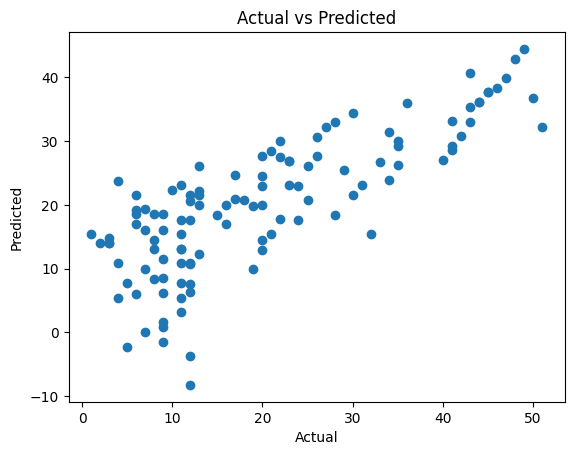

In [97]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## **Future predection**

In [98]:
x_new = df.sample(1)

In [99]:
x_new

,Motor,Screw,Pgain,Vgain,Class
151,5,5,3,1,17


In [100]:
x_new.shape

(1, 5)

In [102]:
x_new = x_new.drop('Class', axis = 1)

In [103]:
x_new

,Motor,Screw,Pgain,Vgain
151,5,5,3,1


In [104]:
x_new.shape

(1, 4)

In [105]:
y_pred_new = lr.predict(x_new)

In [106]:
y_pred_new

array([20.85174257])

## **Explaination**

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. The goal is to find the best-fitting linear relationship that can predict the target variable based on the given features. To explain linear regression step by step using the Servo dataset, we'll go through the following key steps:

1. **Data Collection**:
   - Obtain the Servo dataset, which contains data about a servo-motor system.
   - The dataset typically includes columns like 'motor', 'screw', 'pgain', 'vgain', and 'class'. The 'class' column is usually the target variable we want to predict, while the others are features.

2. **Data Exploration**:
   - Load the dataset into your preferred data analysis tool (e.g., Python with libraries like pandas).
   - Examine the dataset's structure, summary statistics, and any missing values.
   - Visualize the data using scatter plots, histograms, or other relevant plots to gain insights into the relationships between variables.

3. **Data Preprocessing**:
   - Handle missing values if any by either removing or imputing them.
   - Encode categorical variables (e.g., 'motor' and 'screw') into numerical values using techniques like one-hot encoding.
   - Split the dataset into a training set and a testing set for model evaluation.

4. **Model Building**:
   - Choose linear regression as the modeling technique since it's a regression problem.
   - Define your target variable (y) and feature variables (X).
   - Fit a linear regression model to the training data using a library like scikit-learn in Python:
     
     from sklearn.linear_model import LinearRegression
     model = LinearRegression()
     model.fit(X_train, y_train)
     

5. **Model Evaluation**:
   - Use the trained model to make predictions on the testing set:
     
     y_pred = model.predict(X_test)
     
   - Evaluate the model's performance using regression evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
   - Additionally, calculate the R-squared (R²) value to assess how well the model fits the data.

6. **Interpret the Model**:
   - Analyze the coefficients of the linear regression equation to understand the relationships between the features and the target variable.
   - A positive coefficient indicates a positive relationship, while a negative coefficient suggests a negative relationship.

7. **Visualization** (Optional):
   - Create visualizations like scatter plots with regression lines to visualize how well the model fits the data.
   - Plot residuals (the differences between actual and predicted values) to check for any patterns or heteroscedasticity.

8. **Model Deployment** (If needed):
   - If the model performs well, you can deploy it in a production environment for making predictions on new, unseen data.

9. **Fine-Tuning** (Optional):
   - If the initial model's performance is not satisfactory, consider feature engineering, regularization techniques, or trying different machine learning algorithms.

10. **Conclusion**:
    - Summarize your findings, including the model's predictive power, the importance of features, and any insights gained from the analysis.

Remember that linear regression assumes a linear relationship between the features and the target variable. If this assumption doesn't hold, you may need to explore more complex regression techniques or feature transformations to improve predictive accuracy.